## Implementation of k-means clustering alogrithm

In [15]:
%matplotlib inline
import pandas as pd
import simplejson as json  # faster json parsing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import sample

In [57]:
def distance(x, y):
    return np.linalg.norm(x - y)

In [87]:
class KMeans(object):
    def __init__(self, k):
        """
        This class was inspired by the Data Science from Scratch book
        """
        self.k = k 
        self.clusters = []    # List of cluster centers
        
    def classify(self, x):
        """
        Takes a vector x and returns the cluster it's closest to
        """
        return min(xrange(self.k),
                   key=lambda i: distance(x, self.clusters[i]))
    
    def train(self, data):
        """
        Trains clustering algorithm with a list of data points
        """
        self.clusters = sample(data, self.k)
        
        # A group is the beginnings of a cluster
        groups = None
        
        while True:
            new_groups = map(self.classify, data)
            
            if groups == new_groups:
                self.groups = new_groups
                return
            
            groups = new_groups
            
            for i in xrange(self.k):
                cluster_points = np.array([p for p, a in zip(data, groups) if a == i])
            
                if len(cluster_points) > 0:
                    self.clusters[i] = cluster_points.mean(axis=0)

In [71]:
# Import data
with open('data/yelp_academic_dataset_user.json') as f:
    user_data = pd.DataFrame(json.loads(line) for line in f)

#with open('yelp_academic_dataset_review.json') as f:
#    review_data = pd.DataFrame(json.loads(line) for line in f)

#with open('yelp_academic_dataset_business.json') as f:
#    business_data = pd.DataFrame(json.loads(line) for line in f)

In [72]:
user_data.head()

,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,4.14,"{u'profile': 8, u'cute': 15, u'funny': 11, u'p...","[2005, 2006]",69,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{u'funny': 167, u'useful': 282, u'cool': 246}",2004-10
1,3.67,"{u'profile': 117, u'cute': 204, u'funny': 594,...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",1345,"[18kPq7GPye-YQ3LyKyAZPw, 4U9kSBLuBDU391x6bxU-Y...",Jeremy,1292,user,rpOyqD_893cqmDAtJLbdog,"{u'funny': 8399, u'useful': 15242, u'cool': 12...",2004-10
2,3.68,"{u'profile': 9, u'cute': 22, u'funny': 96, u'p...","[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",105,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Michael,395,user,4U9kSBLuBDU391x6bxU-YA,"{u'funny': 722, u'useful': 1349, u'cool': 657}",2004-10
3,4.64,{u'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{u'funny': 1, u'useful': 11, u'cool': 5}",2004-10
4,3.80,"{u'cute': 2, u'plain': 2, u'writer': 2, u'note...",[2005],5,"[rpOyqD_893cqmDAtJLbdog, HDQixQ-WZEV0LVPJlIGQe...",Katherine,66,user,SIBCL7HBkrP4llolm4SC2A,"{u'funny': 13, u'useful': 37, u'cool': 16}",2004-10


In [73]:
# Let's define a feature vectore <# Reviews, # useful>
data = []
for name, values in user_data.sample(frac=0.1, replace=False).iterrows():
    datum = np.array([values['average_stars'], values['votes']['useful']])
    data.append(datum)

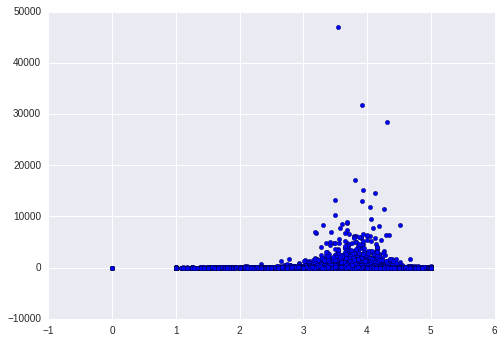

In [74]:
plt.scatter([x[0] for x in data], [x[1] for x in data])

In [78]:
kmeans = KMeans(2)
kmeans.train(data)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [83]:
group_zero = [p for p, a in zip(data, kmeans.groups) if a == 0]
group_one = [p for p, a in zip(data, kmeans.groups) if a == 1]

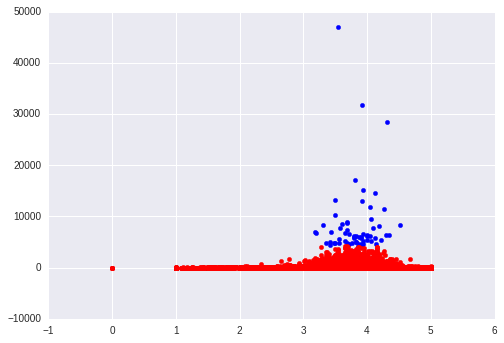

In [86]:
plt.scatter([x[0] for x in group_zero], [x[1] for x in group_zero], color='b')
plt.scatter([x[0] for x in group_one], [x[1] for x in group_one], color='r')